In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteI41Z7J/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteI41Z7J/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteI41Z7J/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [5]:
# print("Train Size {}".format(train_dataset.shape))
# print("Test Size {}".format(test_dataset.shape))

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
print(tokenizer.vocab_size)

8185


In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 147,729
Trainable params: 147,729
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
W = model.layers[1].get_weights()[0]
U = model.layers[1].get_weights()[1]
b = model.layers[1].get_weights()[2]

print("W", W.size)
print("U", U.size)
print("b", b.size)

print("No. of params used in B-directionsl LSTM {}".format(2*(W.size+U.size+b.size)))

W 2048
U 4096
b 128
No. of params used in B-directionsl LSTM 12544


In [14]:
print(model.layers[1].input_shape)

(None, None, 16)


In [15]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 177s 454ms/step - loss: 0.5249 - accuracy: 0.7281 - val_loss: 0.4263 - val_accuracy: 0.8113
Epoch 2/10
391/391 [==============================] - 163s 418ms/step - loss: 0.3231 - accuracy: 0.8752 - val_loss: 0.3910 - val_accuracy: 0.8431
Epoch 3/10
391/391 [==============================] - 165s 421ms/step - loss: 0.2661 - accuracy: 0.9017 - val_loss: 0.3752 - val_accuracy: 0.8373
Epoch 4/10
391/391 [==============================] - 170s 434ms/step - loss: 0.2195 - accuracy: 0.9228 - val_loss: 0.3808 - val_accuracy: 0.8470
Epoch 5/10
391/391 [==============================] - 170s 435ms/step - loss: 0.2057 - accuracy: 0.9269 - val_loss: 0.4059 - val_accuracy: 0.8457
Epoch 6/10
391/391 [==============================] - 173s 443ms/step - loss: 0.1784 - accuracy: 0.9370 - val_loss: 0.4613 - val_accuracy: 0.8034
Epoch 7/10
391/391 [==============================] - 168s 429ms/step - loss: 0.3180 - accuracy: 0.8552 - val_loss: 0.6435 -

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

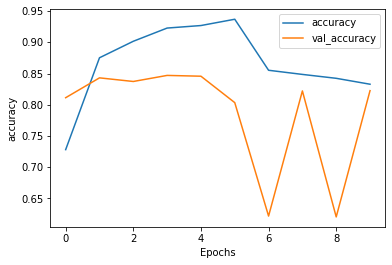

In [17]:
plot_graphs(history, 'accuracy')

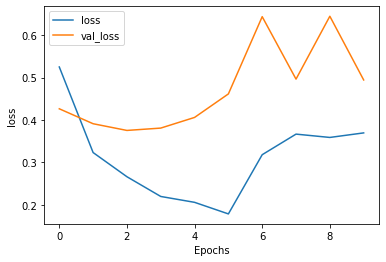

In [18]:
plot_graphs(history, 'loss')